In [1]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.transforms import transforms 
import torch.nn.functional as F

Dataset

In [2]:
input_size=784   #28X28 pixel of image
hidden_size1=200 #size of 1st hidden layer(number of perceptron)
hidden_size2=150 #size of second hidden layer
hidden_size3=100 #size of third hidden layer
hidden_size=80   #size of fourth hidden layer
output =10       #output layer
bach_size=100
lr_rate=0.01

In [3]:
train_dataset=torchvision.datasets.MNIST('/content',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST('/content',train=False,     
              transform=transforms.ToTensor(),download=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [4]:
train_dataloader=torch.utils.data.DataLoader(dataset=train_dataset, 
                                  batch_size=100,shuffle=True)
test_dataloader=torch.utils.data.DataLoader(dataset=test_dataset, 
                                  batch_size=100,shuffle=True)


In [5]:
data=iter(train_dataloader)
samples,labels=next(data)
print(f"number of samples{samples.shape}")
print(f"number of labels {labels.shape}")


number of samplestorch.Size([100, 1, 28, 28])
number of labels torch.Size([100])


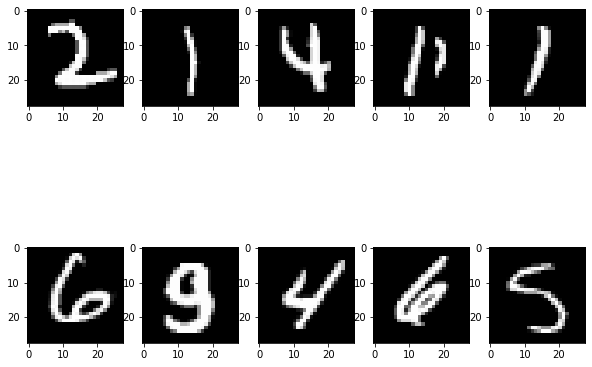

In [6]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(samples[i][0],cmap='gray')
plt.show()

In [7]:
class MNIST(nn.Module):
    def __init__(self,input_size,hidden_size1,hidden_size2
                       ,hidden_size3,hidden_size,output):
        super(MNIST,self).__init__()
        self.f_connected1=nn.Linear(input_size,hidden_size1)
        self.f_connected2=nn.Linear(hidden_size1,hidden_size2)
        self.f_connected3=nn.Linear(hidden_size2,hidden_size3)
        self.f_connected4=nn.Linear(hidden_size3,hidden_size)
        self.out_connected=nn.Linear(hidden_size,output)
    def forward(self,x):
        out=F.relu(self.f_connected1(x)) 
        out=F.relu(self.f_connected2(out))
        out=F.relu(self.f_connected3(out))
        out=F.relu(self.f_connected4(out))
        out=self.out_connected(out)
        return out

In [8]:
Mnist_model=MNIST(input_size,hidden_size1,hidden_size2
                  ,hidden_size3,hidden_size,output)

In [9]:
loss=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(Mnist_model.parameters(),lr=lr_rate)

In [10]:
with torch.no_grad():
    n_correct=0
    n_samples=0
    for images,labels in test_dataloader:
        images=images.reshape(-1,784)
        output=Mnist_model(images)
        labels=labels
        _,prediction=torch.max(output,1)
        n_samples=labels.shape[0]
        n_correct=(prediction==labels).sum().item()
accuracy=(n_correct/n_samples)*100
print(accuracy)

17.0


In [11]:
predicted=[]
with torch.no_grad():
    n_correct=0
    n_samples=0
    for images,labels in test_dataloader:
        images=images.reshape(-1,784)
        output=Mnist_model(images) #applying the model we have built
        labels=labels
        _,prediction=torch.max(output,1)
        predicted.append(prediction)
print(prediction)

tensor([4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 8, 4, 4, 4, 8, 8,
        8, 8, 4, 4, 4, 4, 4, 8, 4, 4, 8, 8, 4, 4, 4, 8, 4, 4, 4, 4, 8, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 8, 8])
